<a href="https://www.kaggle.com/abhijeet1798/case-study-on-startups-2015-2017?scriptVersionId=85886444" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startup-data/startup_funding.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/kaggle/input/startup-data/startup_funding.csv")

In [3]:

pd.set_option('display.max_rows',25)
pd.set_option('display.max_columns',9)
pd.set_option('display.width',200)

print(data)


       SNo        Date       StartupName   IndustryVertical  ...                                      InvestorsName  InvestmentType AmountInUSD                            Remarks
0        0  01/08/2017          TouchKin         Technology  ...                                        Kae Capital  Private Equity   1,300,000                                NaN
1        1  02/08/2017           Ethinos         Technology  ...                         Triton Investment Advisors  Private Equity         NaN                                NaN
2        2  02/08/2017      Leverage Edu  Consumer Internet  ...  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed Funding         NaN                                NaN
3        3  02/08/2017              Zepo  Consumer Internet  ...  Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...    Seed Funding     500,000                                NaN
4        4  02/08/2017      Click2Clinic  Consumer Internet  ...                     Narottam Thudi, Shir

In [4]:
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [5]:
df = data

In [6]:
df = df.dropna(subset=['AmountInUSD']) # Dropping the rows whose investment is not known

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               1525 non-null   int64 
 1   Date              1525 non-null   object
 2   StartupName       1525 non-null   object
 3   IndustryVertical  1394 non-null   object
 4   SubVertical       871 non-null    object
 5   CityLocation      1390 non-null   object
 6   InvestorsName     1520 non-null   object
 7   InvestmentType    1525 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           341 non-null    object
dtypes: int64(1), object(9)
memory usage: 131.1+ KB


In [8]:
# Converting the dates in date time stamp
df['Date'] = pd.to_datetime(df['Date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df.info() # Checking the coversion happened or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SNo               1525 non-null   int64         
 1   Date              1525 non-null   datetime64[ns]
 2   StartupName       1525 non-null   object        
 3   IndustryVertical  1394 non-null   object        
 4   SubVertical       871 non-null    object        
 5   CityLocation      1390 non-null   object        
 6   InvestorsName     1520 non-null   object        
 7   InvestmentType    1525 non-null   object        
 8   AmountInUSD       1525 non-null   object        
 9   Remarks           341 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 131.1+ KB


In [10]:
df = df.drop('SNo',axis = 1) #Dropped the SNo since I will rearrange it

In [11]:
#Data of only 2017
df1 = df[df['Date'].dt.year == 2017]

In [12]:
df1

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,2017-01-07,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,2017-03-07,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
...,...,...,...,...,...,...,...,...,...
436,2017-01-30,Intuit Things,Technology,IoT solutions for home automation applications,Mumbai,Sanjay Mehta & Others ( The Ten Minute Million),Seed Funding,"106,000",NaN
437,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,New Delhi,The Ten Minute Million,Seed Funding,"22,500",NaN
438,2017-01-30,FabX,eCommerce,Used Furniture Marketplace,Mumbai,The Ten Minute Million,Seed Funding,"68,000",NaN
439,2017-01-30,Maptags,Consumer Internet,Smart Online address tags,Bangalore,The Ten Minute Million,Seed Funding,"18,000",NaN


In [13]:
# Rearrange on the basis of date
df1.sort_values(by = 'Date', ascending = False)
df1.reset_index(drop = True, inplace = True)
df1

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
2,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
3,2017-01-07,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
4,2017-03-07,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
...,...,...,...,...,...,...,...,...,...
280,2017-01-30,Intuit Things,Technology,IoT solutions for home automation applications,Mumbai,Sanjay Mehta & Others ( The Ten Minute Million),Seed Funding,"106,000",NaN
281,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,New Delhi,The Ten Minute Million,Seed Funding,"22,500",NaN
282,2017-01-30,FabX,eCommerce,Used Furniture Marketplace,Mumbai,The Ten Minute Million,Seed Funding,"68,000",NaN
283,2017-01-30,Maptags,Consumer Internet,Smart Online address tags,Bangalore,The Ten Minute Million,Seed Funding,"18,000",NaN


In [14]:
#Method to converting my currency column into numerical
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
       # return(x.replace('$', '').replace(',', ''))
        return(x.replace(',', ''))
    return(x)

In [15]:
df1['AmountInUSD'] = df1['AmountInUSD'].apply(clean_currency).astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df1 = df1.sort_values(by = 'AmountInUSD', ascending = False)

In [17]:
df1.reset_index(drop = True, inplace = True)

In [18]:
df1

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,NaN
1,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,NaN
2,2017-01-03,Ola,Consumer Internet,App based cab aggregator,Bangalore,SoftBank Group Corp,Private Equity,3.300000e+08,NaN
3,2017-04-14,Ola Cabs,Consumer Internet,Cab Aggregator App,Bangalore,SIMI Pacific Pte,Private Equity,2.600000e+08,NaN
4,2017-04-24,Oyo Rooms,Consumer Internet,Branded Budget Hotels Aggregator,Gurgaon,"SoftBank Vision Fund, Lightspeed Venture Partn...",Private Equity,2.500000e+08,NaN
...,...,...,...,...,...,...,...,...,...
280,2017-02-17,Leopetra,eCommerce,Solution provider for pet needs,Mumbai,Facebook FBStart,Seed Funding,4.000000e+04,NaN
281,2017-08-02,Edurev,Consumer Internet,Online Education Portal,Gurgaon,Facebook FB Start programme,Seed Funding,4.000000e+04,NaN
282,2017-07-03,Book Servicing,Consumer Internet,Online Vehicle Services Booking platform,New Delhi,National Science and Technology Entrepreneursh...,Seed Funding,3.000000e+04,NaN
283,2017-01-30,Cloudrino,Technology,Cloud based Virtual Servers,New Delhi,The Ten Minute Million,Seed Funding,2.250000e+04,NaN


In [19]:
df2 = df1.head(20)

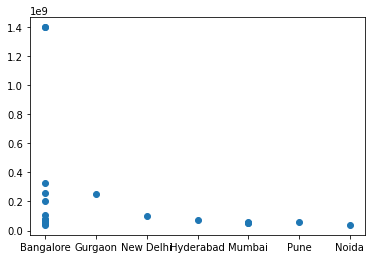

In [20]:
plt.scatter( df2['CityLocation'],df2['AmountInUSD']) # Checking the co-relation

<function matplotlib.pyplot.show(close=None, block=None)>

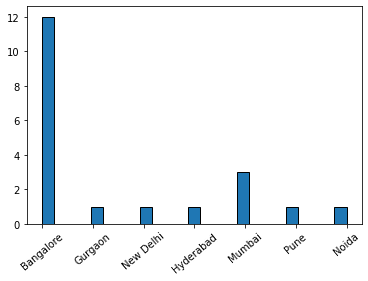

In [21]:
#Histogram Chart to show the max occurance of city amoung the top 20 highest invested company 
plt.hist(df2['CityLocation'],edgecolor = 'black',bins = 25)
plt.xticks(rotation = 40)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

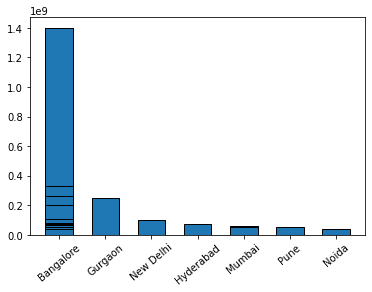

In [22]:
#Bar Graph to show the amount of investment in different city.
plt.bar(df2['CityLocation'], df2['AmountInUSD'],edgecolor = 'black',width = 0.6)
plt.xticks(rotation = 40)
plt.show

In [23]:
df['AmountInUSD'] = df['AmountInUSD'].apply(clean_currency).astype('float')

In [24]:
df.sort_values(by = 'Date', ascending = False)
df.reset_index(drop = True, inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

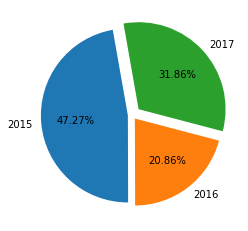

In [25]:
#Total amount of investment year wise as frequency is Y
a = df.groupby(pd.Grouper(key='Date', axis=0, 
                      freq='Y')).sum()
plt.pie(a['AmountInUSD'], labels =['2015','2016','2017'],explode = [0.05,0.05,0.1],startangle = 100, autopct = "%.2f%%")
plt.show

In [26]:
#Lets see overall total what was the total amount invested in Bangalore,Gorgoan,New Delhi, Pune and Mumbai that has come to be the highest investment cities according to our
#insights till now
City = df.groupby(['CityLocation'])
labels = ["Bangalore","Gorgoan", "New Delhi","Pune", "Mumbai"]
Cities = [City.get_group("Bangalore")['AmountInUSD'].sum(), City.get_group("Gurgaon")['AmountInUSD'].sum() , City.get_group("New Delhi")['AmountInUSD'].sum(), City.get_group("Pune")['AmountInUSD'].sum(), City.get_group("Mumbai")['AmountInUSD'].sum()]

<function matplotlib.pyplot.show(close=None, block=None)>

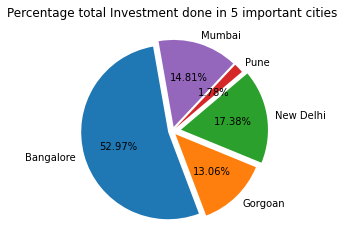

In [27]:
plt.pie(Cities, labels = labels,explode = [0.05,0.05,0.1,0.05,0.05],startangle = 100, autopct = "%.2f%%")
plt.title("Percentage total Investment done in 5 important cities")
plt.show